# Introduction to Time Series

## Feature Engineering

In [1]:
import pandas as pd
import statsmodels as sm

%matplotlib inline

bike_sharing_df = pd.read_csv('bike_sharing_day.csv', index_col=0)
bike_sharing_df.dteday = pd.to_datetime(bike_sharing_df.dteday)

bike_sharing_df.set_index('dteday', inplace=True)
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Predict Temperature From Date Information

In [2]:
temp_df = bike_sharing_df[['temp']].copy()
temp_df.head()

,temp
dteday,
2011-01-01,0.344167
2011-01-02,0.363478
2011-01-03,0.196364
2011-01-04,0.200000
2011-01-05,0.226957


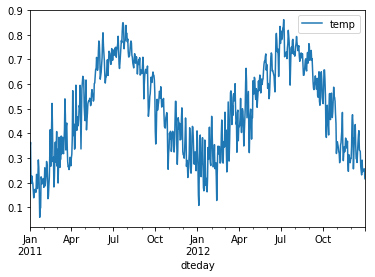

In [3]:
temp_df.plot()

### Create Lag Features

In [4]:
temp_df['temp_shift_1'] = temp_df.temp.shift(1)

In [5]:
temp_df.head()

,temp,temp_shift_1
dteday,,
2011-01-01,0.344167,NaN
2011-01-02,0.363478,0.344167
2011-01-03,0.196364,0.363478
2011-01-04,0.200000,0.196364
2011-01-05,0.226957,0.200000


#### Ridge Regression with Lag Feature

In [6]:
def time_series_train_test_split(dataframe, target, pct=30):
    n = dataframe.shape[0]
    dataframe = dataframe.dropna().copy()
    train_n = int(n*(100-pct)/100)
    train_feats = list(dataframe.columns)
    train_feats.remove(target)
    return (dataframe[:train_n][train_feats],
            dataframe[train_n:][train_feats],
            dataframe[:train_n][target],
            dataframe[train_n:][target])

In [7]:
feature_tr_df, feature_ts_df, target_tr, target_ts = time_series_train_test_split(temp_df, 'temp')

In [8]:
feature_tr_df.shape, feature_ts_df.shape

((511, 1), (219, 1))

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(feature_tr_df, target_tr)
ridge.score(feature_tr_df, target_tr), ridge.score(feature_ts_df, target_ts) 

(0.8781595873422585, 0.9183153251330154)

In [10]:
predictions_df = temp_df[['temp']].copy()

In [11]:
predictions_df['temp_shift_1_model'] = pd.concat([pd.Series(ridge.predict(feature_tr_df), index=feature_tr_df.index),
                                                  pd.Series(ridge.predict(feature_ts_df), index=feature_ts_df.index)])

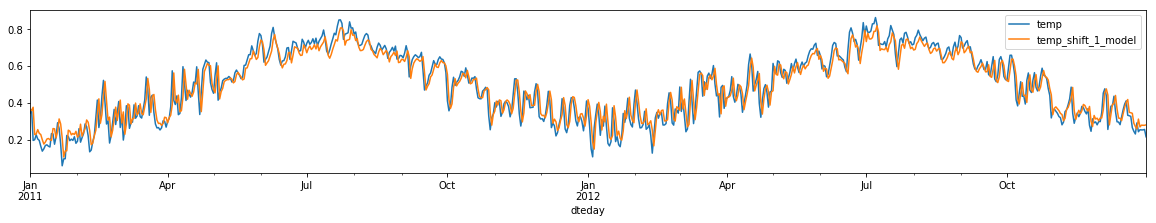

In [12]:
predictions_df.plot(figsize=(20,3))

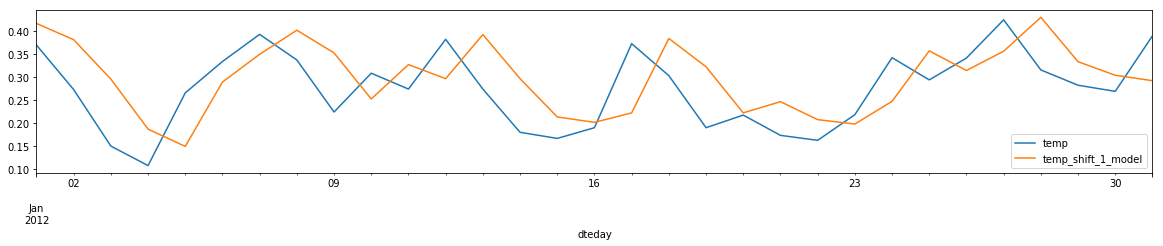

In [13]:
predictions_df['2012-01'].plot(figsize=(20,3))

In [14]:
begin_testing = min(feature_ts_df.index)

In [15]:
begin_testing

Timestamp('2012-05-27 00:00:00')

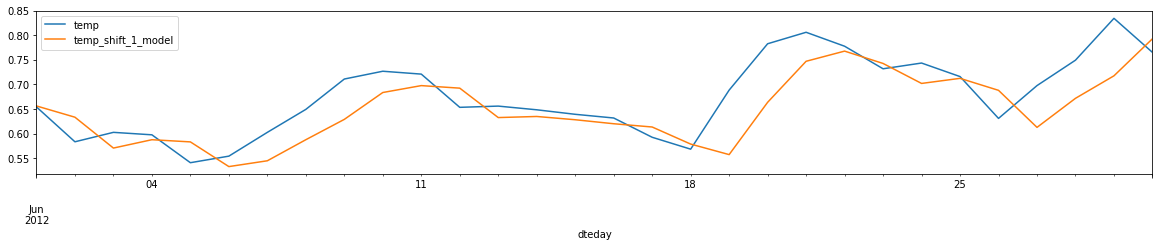

In [16]:
predictions_df['06/2012'].plot(figsize=(20,3))

#### Add more Lag Features

In [17]:
temp_df['temp_shift_2'] = temp_df.temp.shift(2)
temp_df['temp_shift_3'] = temp_df.temp.shift(3)
temp_df['temp_shift_4'] = temp_df.temp.shift(4)
temp_df['temp_shift_5'] = temp_df.temp.shift(5)

In [18]:
temp_df.head(10)

,temp,temp_shift_1,temp_shift_2,temp_shift_3,temp_shift_4,temp_shift_5
dteday,,,,,,
2011-01-01,0.344167,NaN,NaN,NaN,NaN,NaN
2011-01-02,0.363478,0.344167,NaN,NaN,NaN,NaN
2011-01-03,0.196364,0.363478,0.344167,NaN,NaN,NaN
2011-01-04,0.200000,0.196364,0.363478,0.344167,NaN,NaN
2011-01-05,0.226957,0.200000,0.196364,0.363478,0.344167,NaN
2011-01-06,0.204348,0.226957,0.200000,0.196364,0.363478,0.344167
2011-01-07,0.196522,0.204348,0.226957,0.200000,0.196364,0.363478
2011-01-08,0.165000,0.196522,0.204348,0.226957,0.200000,0.196364
2011-01-09,0.138333,0.165000,0.196522,0.204348,0.226957,0.200000


In [19]:
feature_tr_df, feature_ts_df, target_tr, target_ts = time_series_train_test_split(temp_df, 'temp')

In [20]:
feature_tr_df.shape, feature_ts_df.shape

((511, 5), (215, 5))

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(feature_tr_df, target_tr)
ridge.score(feature_tr_df, target_tr), ridge.score(feature_ts_df, target_ts) 

(0.8889446232496989, 0.9206541116798967)

In [22]:
predictions_df['temp_shift_5_model'] = pd.concat([pd.Series(ridge.predict(feature_tr_df), index=feature_tr_df.index),
                                                  pd.Series(ridge.predict(feature_ts_df), index=feature_ts_df.index)])

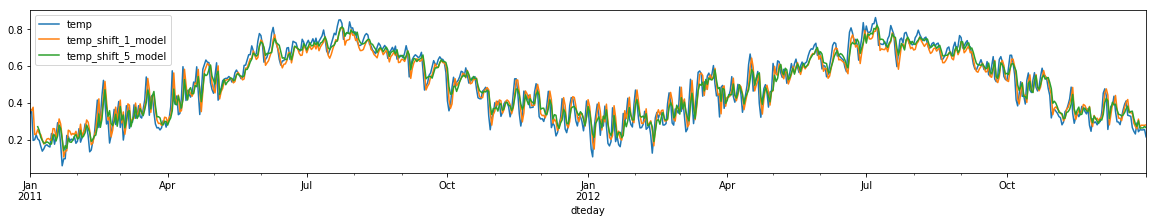

In [23]:
predictions_df.plot(figsize=(20,3))

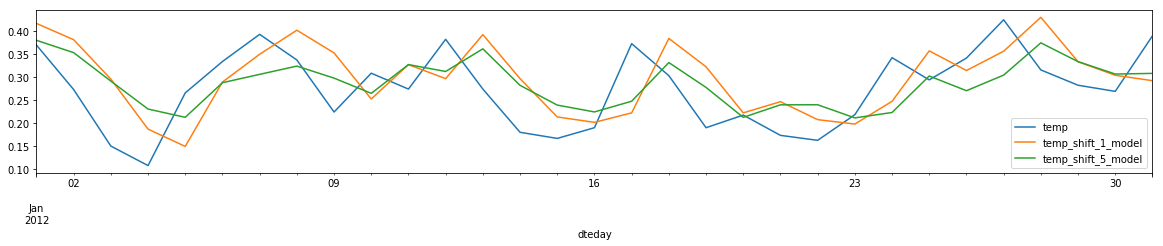

In [24]:
predictions_df['2012-01'].plot(figsize=(20,3))

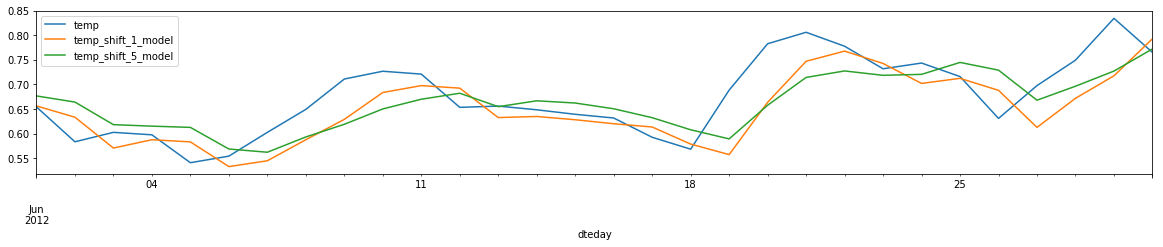

In [25]:
predictions_df['06/2012'].plot(figsize=(20,3))

##### You may need a lag value from last week, last month, and last year. This comes down to the specific domain.

### Rolling Window Statistics

In [26]:
width = 3
window = temp_df.temp_shift_1.rolling(window=width)

In [27]:
temp_df['min'] = window.min()
temp_df['mean'] = window.mean()
temp_df['max'] = window.max()

In [28]:
temp_df.head(15)

,temp,temp_shift_1,temp_shift_2,temp_shift_3,temp_shift_4,temp_shift_5,min,mean,max
dteday,,,,,,,,,
2011-01-01,0.344167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02,0.363478,0.344167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,0.196364,0.363478,0.344167,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.200000,0.196364,0.363478,0.344167,NaN,NaN,0.196364,0.301336,0.363478
2011-01-05,0.226957,0.200000,0.196364,0.363478,0.344167,NaN,0.196364,0.253281,0.363478
2011-01-06,0.204348,0.226957,0.200000,0.196364,0.363478,0.344167,0.196364,0.207774,0.226957
2011-01-07,0.196522,0.204348,0.226957,0.200000,0.196364,0.363478,0.200000,0.210435,0.226957
2011-01-08,0.165000,0.196522,0.204348,0.226957,0.200000,0.196364,0.196522,0.209276,0.226957
2011-01-09,0.138333,0.165000,0.196522,0.204348,0.226957,0.200000,0.165000,0.188623,0.204348


In [29]:
feature_tr_df, feature_ts_df, target_tr, target_ts = time_series_train_test_split(temp_df, 'temp')

In [30]:
feature_tr_df.shape, feature_ts_df.shape

((511, 8), (215, 8))

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(feature_tr_df, target_tr)
ridge.score(feature_tr_df, target_tr), ridge.score(feature_ts_df, target_ts) 

(0.8898422289369925, 0.9213260584077566)

In [32]:
predictions_df['temp_rolling_window'] = pd.concat([pd.Series(ridge.predict(feature_tr_df), index=feature_tr_df.index),
                                                   pd.Series(ridge.predict(feature_ts_df), index=feature_ts_df.index)])

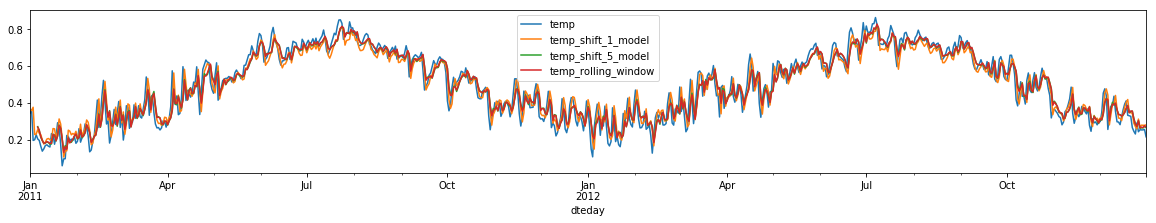

In [33]:
predictions_df.plot(figsize=(20,3))

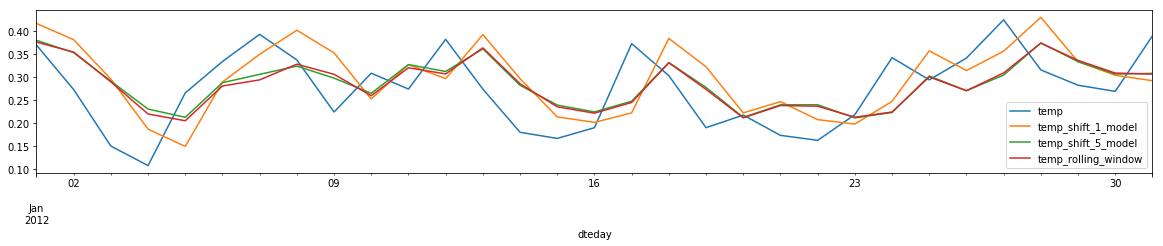

In [34]:
predictions_df['2012-01'].plot(figsize=(20,3))

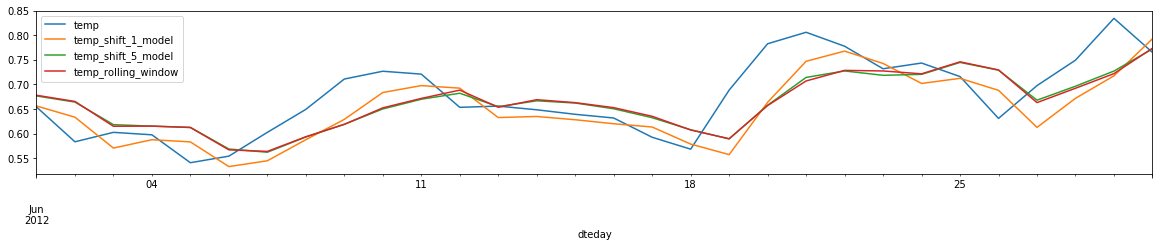

In [35]:
predictions_df['06/2012'].plot(figsize=(20,3))

#### Just the Moving Average

In [36]:
feature_tr_df, feature_ts_df, target_tr, target_ts = time_series_train_test_split(temp_df[['mean','temp']], 'temp')

In [37]:
feature_tr_df.shape, feature_ts_df.shape

((511, 1), (217, 1))

In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(feature_tr_df, target_tr)
ridge.score(feature_tr_df, target_tr), ridge.score(feature_ts_df, target_ts) 

(0.8285389247328111, 0.8772964461298204)

In [39]:
predictions_df['temp_ma'] = pd.concat([pd.Series(ridge.predict(feature_tr_df), index=feature_tr_df.index),
                                                   pd.Series(ridge.predict(feature_ts_df), index=feature_ts_df.index)])

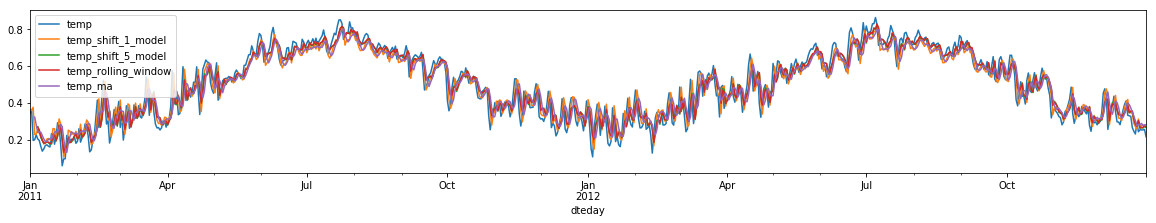

In [40]:
predictions_df.plot(figsize=(20,3))

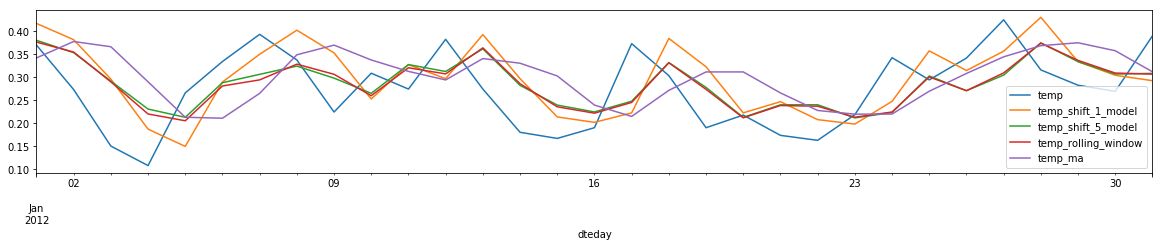

In [41]:
predictions_df['2012-01'].plot(figsize=(20,3))

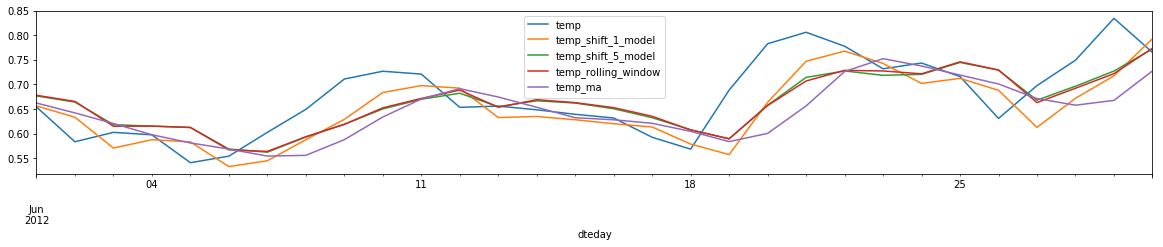

In [42]:
predictions_df['06/2012'].plot(figsize=(20,3))